<h2>202140090-홍기현-Assignment4</h2>

<hr>

- Since we cover the basics of ANN and CNN, I want you to delve into more advanced technologies. Please study the following DNNs and submit your report.
- Inception Model, RNN, LSTM, GRU (Gated Recurrent Units, VAE (Variational AutoEncoder), GAN 
- Report can be any format but should include the following content.
    - Characterists
    - Model Structure
    - Training: Backpropagation, Optimization, Regularization
    - Things considered in the network

<br>
<hr>
<h3>Backpropagation, Optimization, Regularization</h3>
<br>

- 초기의 가중치는 0 ~ 1 사이의 값으로 랜덤으로 결정된다.
- 또한, 입력층에서 입력을 위해 각 특징(x1, x2)는 Regularization될 수 있으며, 이를 통하여 학습의 속도 및 성능에서 향상을 기대함

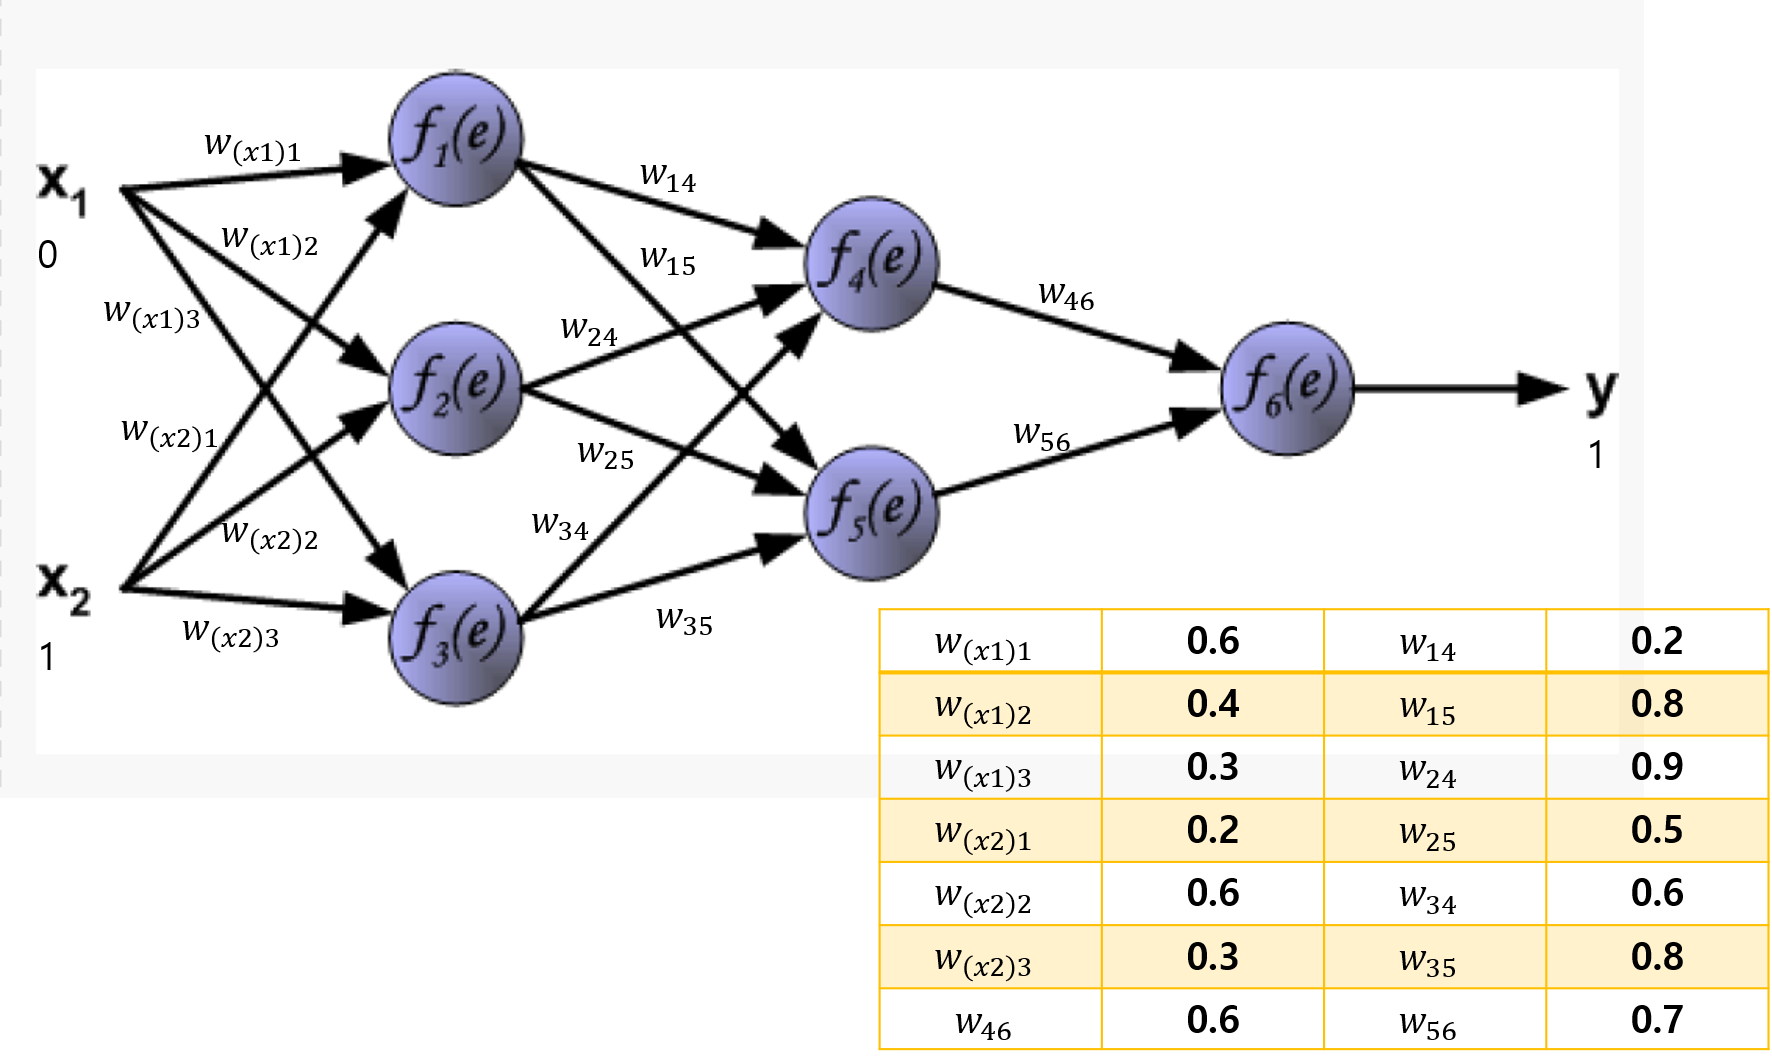

In [14]:
Image("myImages/ANN1.png")

<br>

- 입력 특징 값과 가중치를 계산하여 연결된 각 노드의 output 값을 출력함
- 이때 하나의 노드의 output 값은 연결된 모든 가중치에 대해서 실시
- 출력층까지 수행

<br>

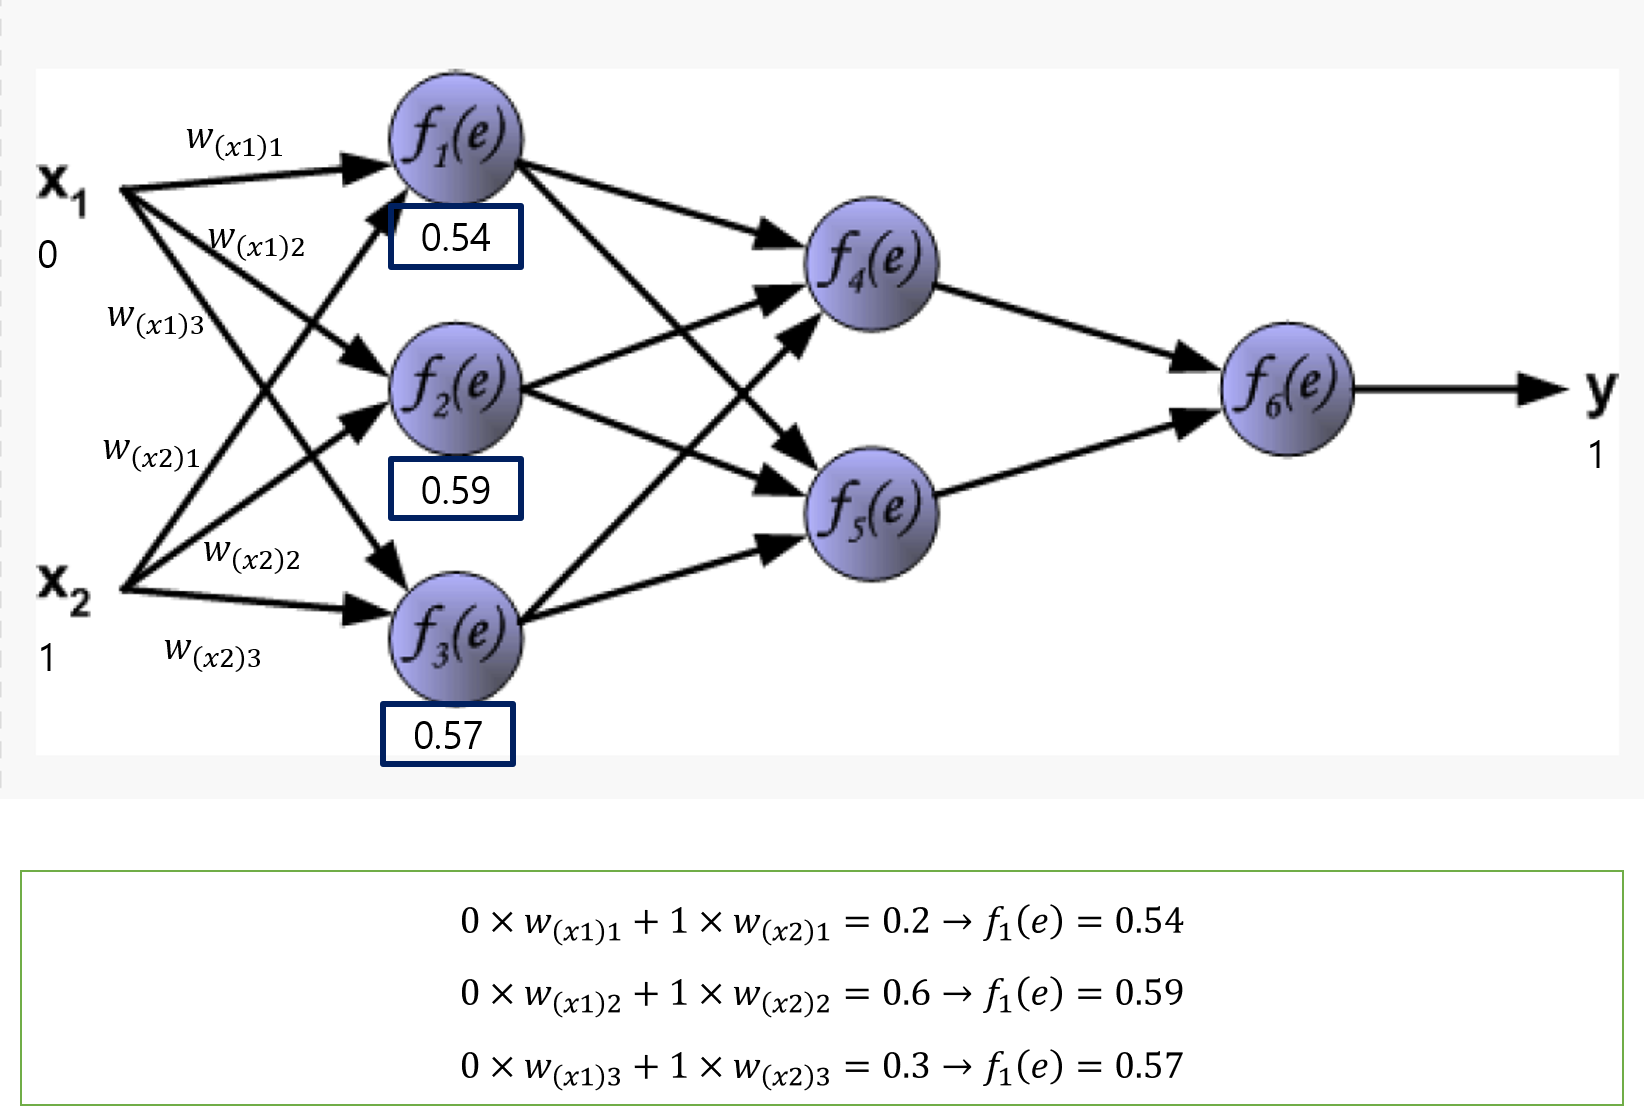

In [15]:
Image("myImages/ANN2.png")

<br>

- 출력으로 예측한 결과와 실제 정답 사이의 값이 오차이며, 이를 통해 각 노드의 오차를 구함
- 오차를 구하는 과정이 Backpropagation이며, 입력층의 노드까지 오차를 구함

<br>

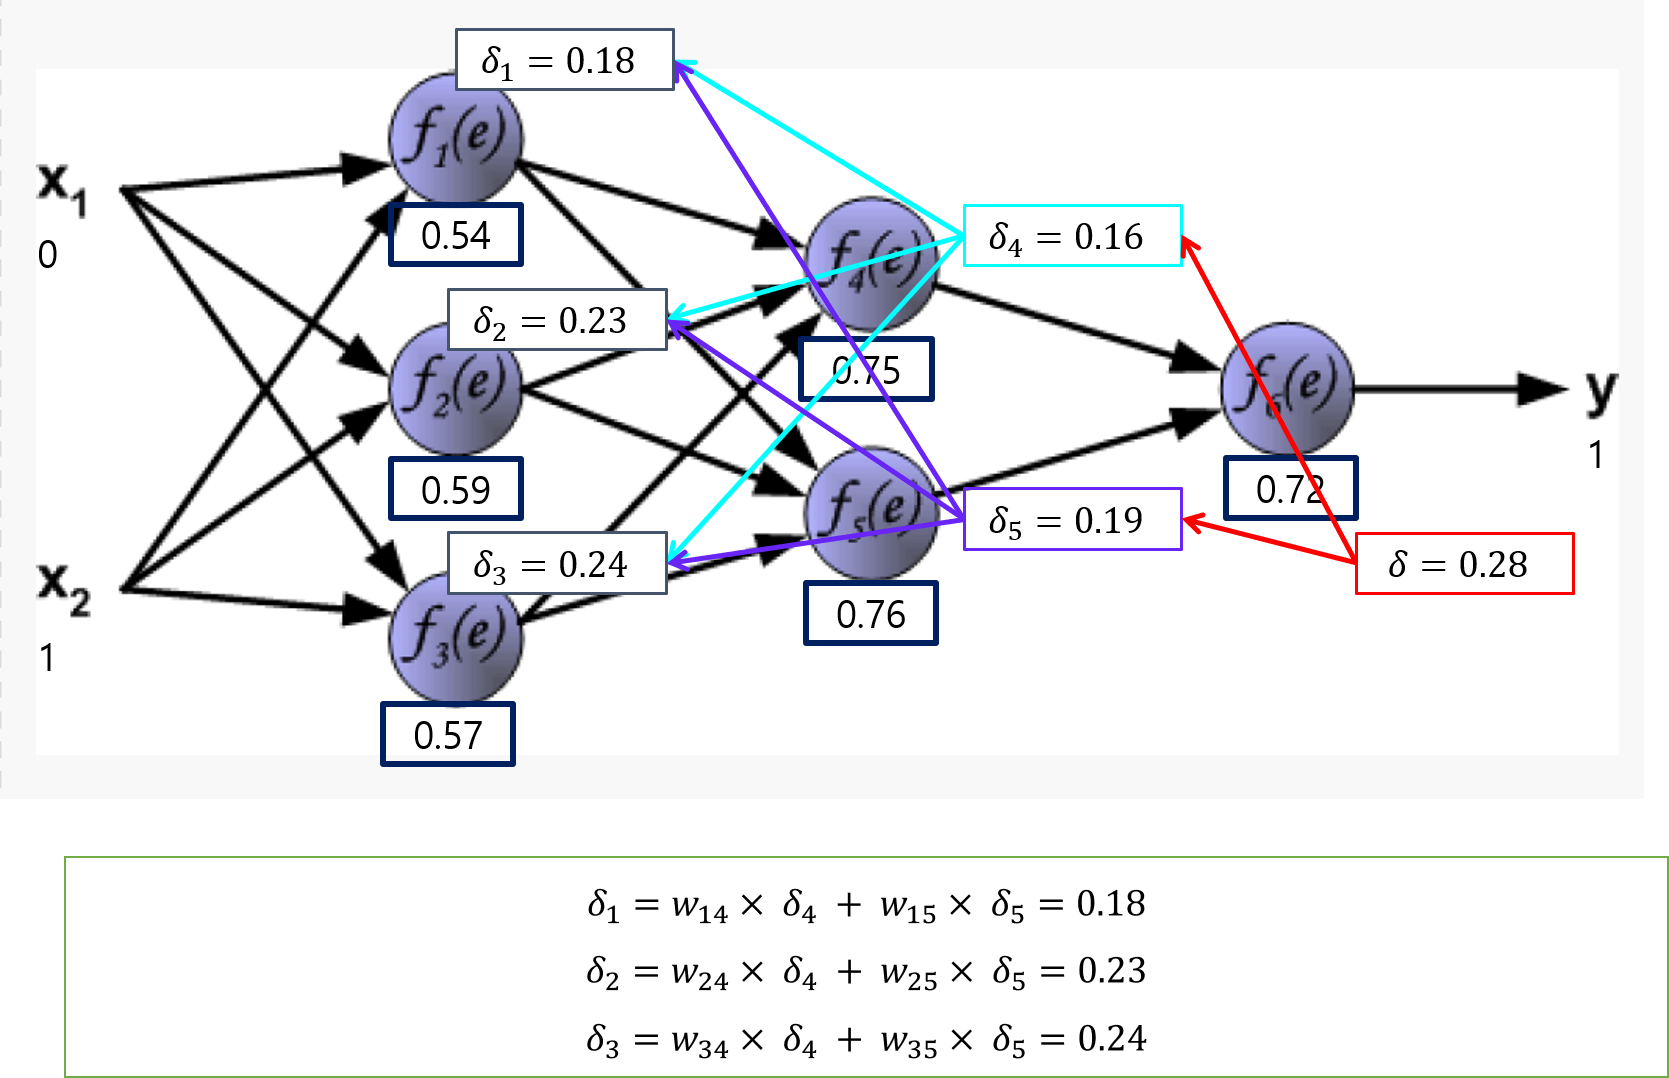

In [16]:
Image("myImages/ANN3.png")

<br>

- 각 노드의 오차를 수정하며, 이 수정하는 정도는 Optimization을 통하여 연산
- 옵티마이저는 다양하며, 어떠한 옵티마이저를 선택하는가에 따라 학습 속도와 수렴에서 차이를 보임

<br>

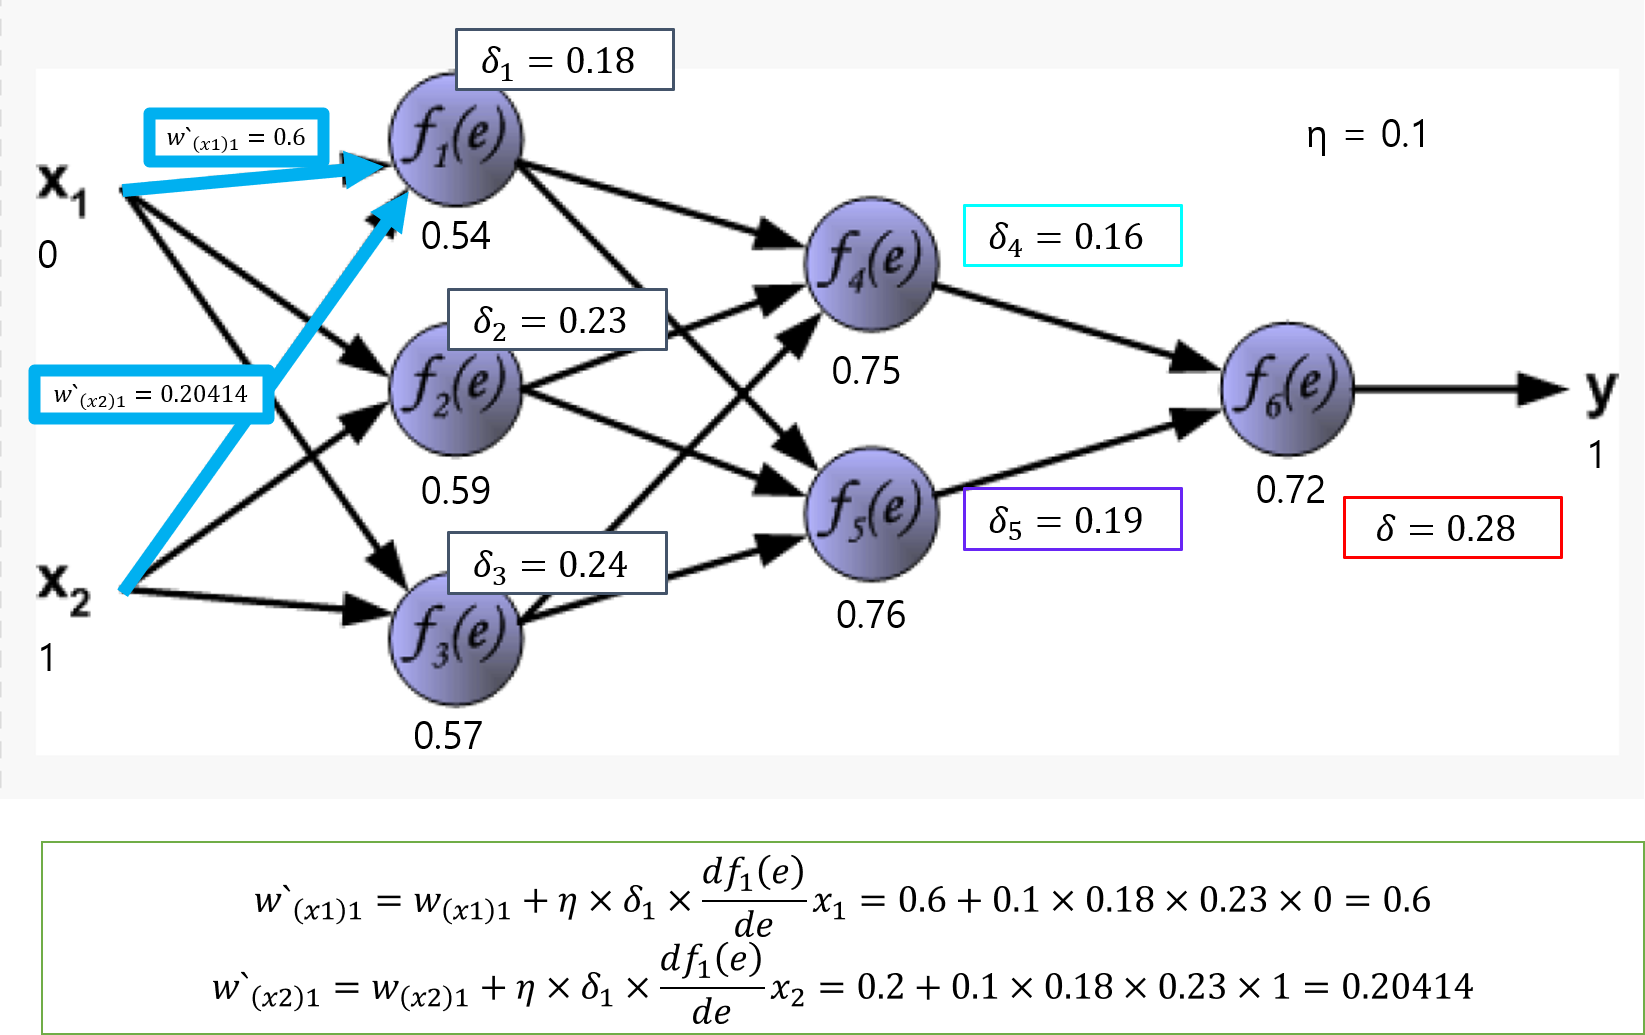

In [17]:
Image("myImages/ANN4.png")

<br>

- 수정된 가중치는 다음과 같으며, 이를 반복 수행하여 출력을 잘 예측하는 모델을 만드는 과정을 학습이라고 함

<br>

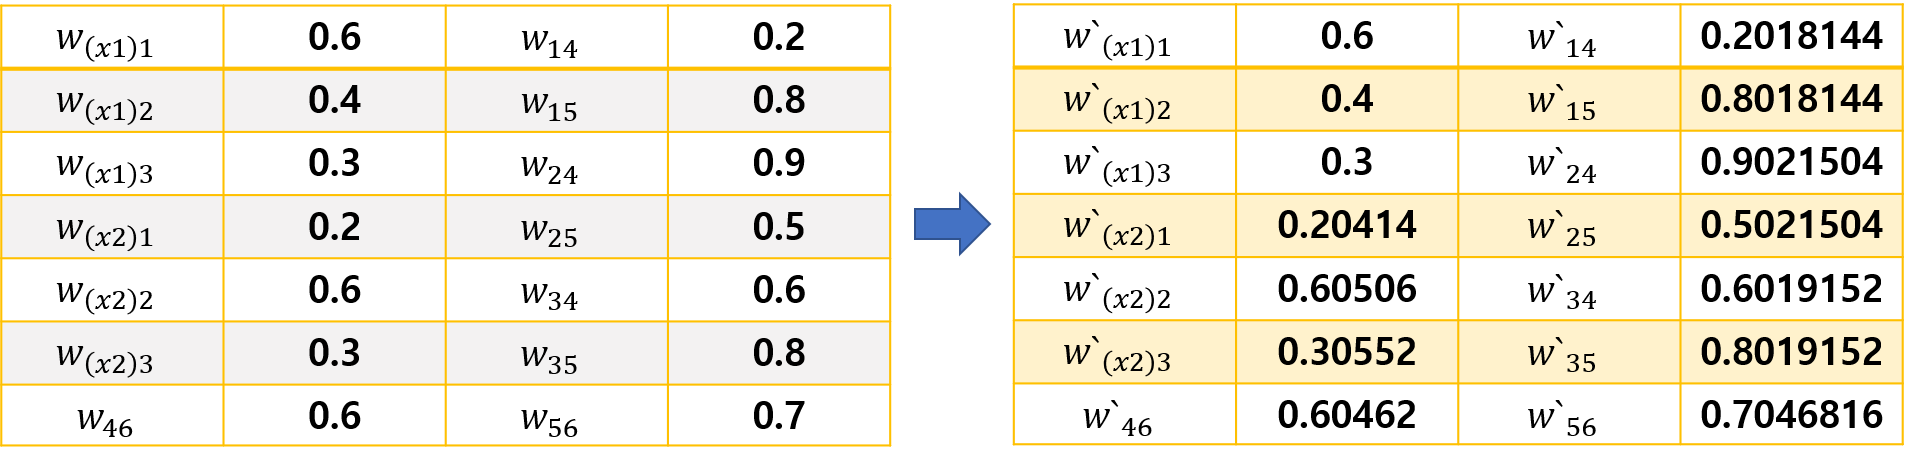

In [18]:
Image("myImages/ANN5.png")

<br>
<hr>
<h3>필요 Module import</h3>

In [2]:
import numpy as np
import matplotlib as mpl
import IPython.display as display
import PIL.Image
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras

from keras.applications import inception_v3
from keras import backend as K
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.layers import LSTM
from IPython.display import Image
from keras import layers
from keras.models import Model
from keras.layers import LSTM
from keras.layers import GRU
from scipy.stats import norm
from keras.datasets import mnist
from keras.preprocessing import image

<hr>
<br>
<h3>Inception Model</h3>

<br>

- 네트워크가 이전의 CNN보다 훨씬 깊으며 Inception Module이라는 서브 네트워크를 가지고 있어서 이저의 구조보다 훨씬 혀과적으로 파라매터를 사용함
- 실제로 이전의 모델인 AlexNet보다 10배나 적은 파라매터를 가짐(6천만 개 -> 6백만 개)

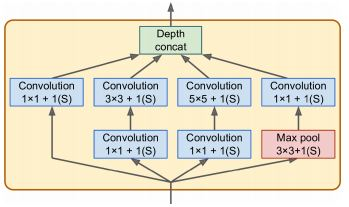

In [2]:
Image("myImages/inceptionModule.jpg")

- Inception Module의 구조는 위와 같으며 '3\*3+1(s)' 표시는 3\*3커널, 스트라이드 1, 'same' 패딩을 사용한다는 의미
- 처음애 입력 신호가 복사되어 네 개의 다른 층에 주입되며, 모든 합성곱 층은 Relu 활성화 함수를 사용함
- 두 번째 합성곱 층은 각기 다른 커널 크기를 사용하며 다른 크기의 패턴을 잡음
- 모든 층은 스트라이드 1과 'same' 패딩을 사용하므로 출력의 높이와 너비가 모두 입력과 같음
- Inception Module이 1\*1 합성곱 층을 가지는 이유
    - 공간상의 패턴을 잡을 수는 없지만 깊이 차원을 따라 놓인 패턴을 잡을 수 있음
    - 입력보다 더 적은 특성맵을 출력하므로 차원을 줄인다는 의미인 병목 층의 역할

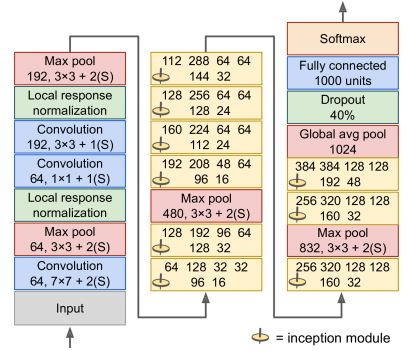

In [3]:
Image("myImages/inceptionModuleSummary.jpg")

<br>

- Inception Module을 사용한 GoogleNet의 구조
    - 처음 두 층은 계산의 양을 줄이기 위해 이미지의 높이와 너비를 4배로 줄임
    - LRN 층은 이전 층이 다양한 특성을 학습하도록 만듬
    - 이어지는 두 개의 합성곱 층 중에서 첫 번재 층이 앞서 설명했듯이 병목 층처럼 작동
    - 다시 한 번 LRN 층이 이전 층이 다양한 패턴을 학습하도록 만듬
    - 그 다음에 최대 풀링 층이 계산 속도를 높이기 위해 이미지의 높이와 너비를 2배로 줄임
    - 9개의 인셉션 모듈이 길게 이어지고, 차원 감소와 속도 향상을 위해 몇 개의 최대 풀링 층을 끼워 넣음
    - 그 다음 전역 평균 풀링 층이 각 특성 맵의 평균을 출력
    - 마지막 층은 규제를 위한 드롭아웃 층 다음에 1,000개의 유닛과 소프트 맥스 활성화 함수를 적용한 완전 연결 층

<h4>Inception Model 실행 예제</h4>

- DeepDream은 합성곱 신경망이 학습한 표현을 사용하여 예술적으로 이미지를 조작하는 기법

<br>
<h4>DeepDream의 특징</h4>

- DeepDream에서는 특정 필터가 아니라 전체 층의 활성화를 최대화하며 한꺼번에 많은 특성을 섞어 시각화
- 빈 이미지나 노이즈가 조금 있는 입력이 아니라 이미 가지고 있는 이미지를 사용함
- 입력 이미지는 시각 품질을 높이기 위해 여러 다른 스케일로 처리됨

In [4]:
# 모델을 훈련하지 않습니다. 이 명령은 모든 훈련 연산을 비활성화합니다
K.set_learning_phase(0)

# 합성곱 기반층만 사용한 인셉션 V3 네트워크를 만듭니다. 사전 훈련된 ImageNet 가중치와 함께 모델을 로드합니다
model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)

In [5]:
# 층 이름과 계수를 매핑한 딕셔너리.
# 최대화하려는 손실에 층의 활성화가 기여할 양을 정합니다.
# 층 이름은 내장된 인셉션 V3 애플리케이션에 하드코딩되어 있는 것입니다.
# model.summary()를 사용하면 모든 층 이름을 확인할 수 있습니다
layer_contributions = {
    'mixed2': 0.2,
    'mixed3': 3.,
    'mixed4': 2.,
    'mixed5': 1.5,
}

In [6]:
# 층 이름과 층 객체를 매핑한 딕셔너리를 만듭니다.
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# 손실을 정의하고 각 층의 기여분을 이 스칼라 변수에 추가할 것입니다
loss = K.variable(0.)
for layer_name in layer_contributions:
    coeff = layer_contributions[layer_name]
    # 층의 출력을 얻습니다
    activation = layer_dict[layer_name].output

    scaling = K.prod(K.cast(K.shape(activation), 'float32'))
    # 층 특성의 L2 노름의 제곱을 손실에 추가합니다. 이미지 테두리는 제외하고 손실에 추가합니다.
    loss += coeff * K.sum(K.square(activation[:, 2: -2, 2: -2, :])) / scaling

In [7]:
# 이 텐서는 생성된 딥드림 이미지를 저장합니다
dream = model.input

# 손실에 대한 딥드림 이미지의 그래디언트를 계산합니다
grads = K.gradients(loss, dream)[0]

# 그래디언트를 정규화합니다(이 기교가 중요합니다)
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)

# 주어진 입력 이미지에서 손실과 그래디언트 값을 계산할 케라스 Function 객체를 만듭니다
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)

def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values

# 이 함수는 경사 상승법을 여러 번 반복하여 수행합니다
def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('...', i, '번째 손실 :', loss_value)
        x += step * grad_values
    return x

In [8]:
def resize_img(img, size):
    img = np.copy(img)
    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)


def preprocess_image(image_path):
    # 사진을 열고 크기를 줄이고 인셉션 V3가 인식하는 텐서 포맷으로 변환하는 유틸리티 함수
    img = image.load_img(image_path)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # 넘파이 배열을 적절한 이미지 포맷으로 변환하는 유틸리티 함수
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        # inception_v3.preprocess_input 함수에서 수행한 전처리 과정을 복원합니다
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [9]:
# 하이퍼파라미터를 바꾸면 새로운 효과가 만들어집니다
step = 0.01  # 경상 상승법 단계 크기
num_octave = 3  # 경사 상승법을 실행할 스케일 단계 횟수
octave_scale = 1.4  # 스케일 간의 크기 비율
iterations = 20  # 스케일 단계마다 수행할 경사 상승법 횟수

# 손실이 10보다 커지면 이상한 그림이 되는 것을 피하기 위해 경사 상승법 과정을 중지합니다
max_loss = 10.

# 사용할 이미지 경로를 씁니다
base_image_path = './myImages/original_photo_deep_dream.jpg'

# 기본 이미지를 넘파이 배열로 로드합니다
img = preprocess_image(base_image_path)

# 경사 상승법을 실행할 스케일 크기를 정의한 튜플의 리스트를 준비합니다
original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)

# 이 리스트를 크기 순으로 뒤집습니다
successive_shapes = successive_shapes[::-1]

# 이미지의 넘파이 배열을 가장 작은 스케일로 변경합니다
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('처리할 이미지 크기', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)


처리할 이미지 크기 (178, 178)
... 0 번째 손실 : 0.6596178
... 1 번째 손실 : 1.0167826
... 2 번째 손실 : 1.4680867
... 3 번째 손실 : 2.0048938
... 4 번째 손실 : 2.613089
... 5 번째 손실 : 3.0942776
... 6 번째 손실 : 3.5965648
... 7 번째 손실 : 4.060503
... 8 번째 손실 : 4.484214
... 9 번째 손실 : 4.898747
... 10 번째 손실 : 5.3754606
... 11 번째 손실 : 5.7722063
... 12 번째 손실 : 6.1361294
... 13 번째 손실 : 6.557408
... 14 번째 손실 : 7.0403256
... 15 번째 손실 : 7.370359
... 16 번째 손실 : 7.773394
... 17 번째 손실 : 8.149465
... 18 번째 손실 : 8.517624
... 19 번째 손실 : 8.910329
처리할 이미지 크기 (250, 250)
... 0 번째 손실 : 2.2056298
... 1 번째 손실 : 3.5552647
... 2 번째 손실 : 4.6517973
... 3 번째 손실 : 5.5449123
... 4 번째 손실 : 6.473653
... 5 번째 손실 : 7.2091255
... 6 번째 손실 : 7.9227896
... 7 번째 손실 : 8.668312
... 8 번째 손실 : 9.377219
처리할 이미지 크기 (350, 350)
... 0 번째 손실 : 2.3039355
... 1 번째 손실 : 3.4831023
... 2 번째 손실 : 4.539009
... 3 번째 손실 : 5.469509
... 4 번째 손실 : 6.4255657
... 5 번째 손실 : 7.2933273
... 6 번째 손실 : 8.126654
... 7 번째 손실 : 9.083442


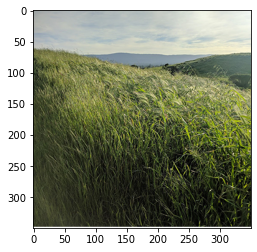

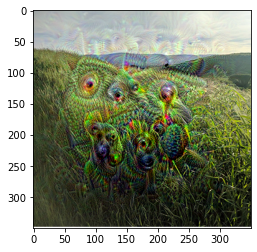

In [10]:
plt.imshow(plt.imread(base_image_path))
plt.figure()

plt.imshow(deprocess_image(np.copy(img)))
plt.show()

<br>
<hr>
<h3>RNN</h3>

<br>

- 순환신경망은 과거 정보를 사용하여 구축되며 새롭게 얻은 정보를 계속 업데이트함
- Sequence의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장함
- RNN은 내부에 루프(loop)를 가진 신경망의 한 종류

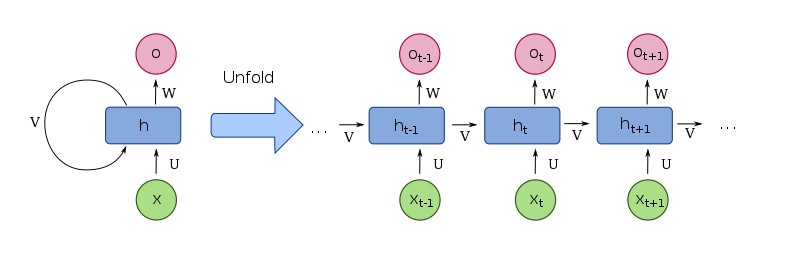

In [19]:
Image("myImages/RNN.png")

<br>
<h4>옵티마이저</h4>
<br>

- 옵티마이저는 학습의 속도를 빠르고 안정적이게 하는 것

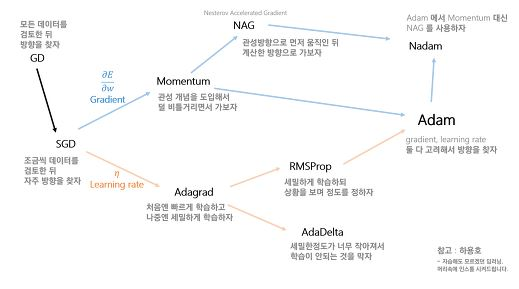

In [20]:
Image("myImages/optimizerUpdate.jpg")

- 학습식에서 수정할 수 있는 부분은 Learning Rate와 Gradient 부분
- Optimizer의 발전 과정은 어떤 부분을 수정하느냐에 따라 나누어 짐
    - Gradient를 수정한 Momentum, Nag
    - Learning Rate를 수정한 Adagrad, RMSProp, AdaDelta
    - 이 두 종류의 장점을 합한 Adam, Nadam

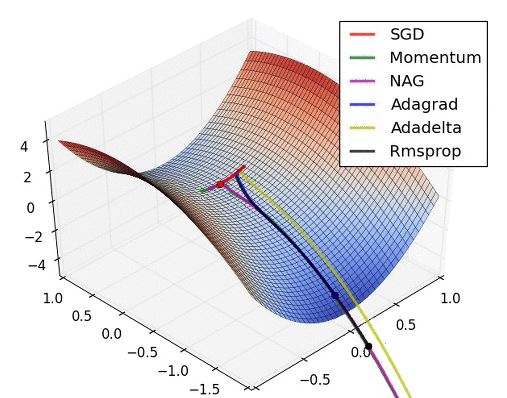

In [21]:
Image("myImages/optimizer.jpg")

<br>
<h4>RNN 실행 예제</h4>

- IMDB의 영화 리뷰 데이터 세트의 긍정과 부정 리뷰를 분석하는 모델을 RNN을 통하여 구현한다.
- 문장 각각의 단어를 Input 데이터로 이용한다.

In [3]:
max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 10s 60ms/step - loss: 0.6604 - acc: 0.5821 - val_loss: 0.4216 - val_acc: 0.8226
Epoch 2/20
157/157 [==============================] - 9s 59ms/step - loss: 0.3946 - acc: 0.8346 - val_loss: 0.3403 - val_acc: 0.8630
Epoch 3/20
157/157 [==============================] - 10s 62ms/step - loss: 0.2912 - acc: 0.8860 - val_loss: 0.4327 - val_acc: 0.7942
Epoch 4/20
157/157 [==============================] - 9s 60ms/step - loss: 0.2322 - acc: 0.9131 - val_loss: 0.5538 - val_acc: 0.7946
Epoch 5/20
157/157 [==============================] - 9s 61ms/step - loss: 0.1904 - acc: 0.9285 - val_loss: 0.4128 - val_acc: 0.8164
Epoch 6/20
157/157 [==============================] - 10s 61ms/step - loss: 0.1393 - acc: 0.9509 - val_loss: 0.4943 - val_acc: 0.7738
Epoch 7/20
157/157 [==============================] - 10s 61ms/step - loss: 0.1038 - acc: 0.9656 - val_loss: 0.5809 - val_acc: 0.8370
Epoch 8/20
157/157 [==============================] - 10s 61ms/st

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


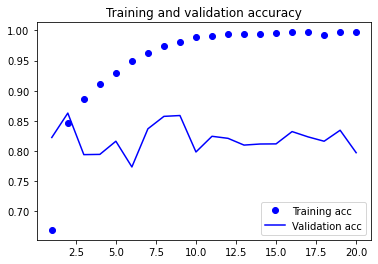

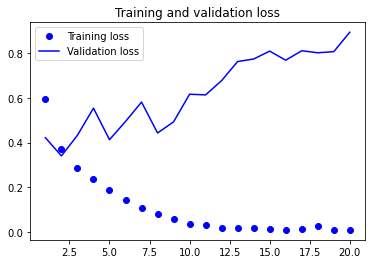

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<br>
<h4>학습 결과</h4>
<br>

- 학습 결과를 보면 RNN으로 IMDB 리뷰 데이터 세트 분류의 정확도는 검증 데이터에서 약 83%의 분류 정확도를 보여줌
- 학습 데이터의 정확도는 99.8%까지 상승하였지만, 이는 Overfitting된 결과로 보임

<br>
<hr>
<h3>LSTM</h3>

<br>

- RNN은 이론적으로 시간 t에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없는 것이 문제

<br>
<h4>LSTM의 특징</h4>
<br>

- Long Short Term Memory는 호크라이더와 수미트후버가 1997년에 개발
- 정보를 여러 타임스텝에 걸쳐 나르는 방법이 추가
- 나중을 위해 정보를 저장함으로써 처리 과정에서 오래된 시그널이 점차 소실되는 것을 막아줌

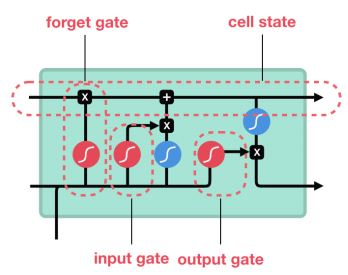

In [22]:
Image("myImages/LSTM.jpg")

<br>

- 가중치는 행렬에 따라 결정되며 엔드-투-엔드 방식으로 학습됨
- RNN 셀의 사양은 가설 공간을 결정함

<br>
<h4>LSTM 실행 예제</h4>
<br>

In [7]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 24s 143ms/step - loss: 0.6112 - acc: 0.6725 - val_loss: 0.3297 - val_acc: 0.8730
Epoch 2/10
157/157 [==============================] - 23s 144ms/step - loss: 0.3158 - acc: 0.8776 - val_loss: 0.4303 - val_acc: 0.8010
Epoch 3/10
157/157 [==============================] - 22s 142ms/step - loss: 0.2435 - acc: 0.9077 - val_loss: 0.4807 - val_acc: 0.8322
Epoch 4/10
157/157 [==============================] - 22s 142ms/step - loss: 0.1969 - acc: 0.9283 - val_loss: 0.3280 - val_acc: 0.8538
Epoch 5/10
157/157 [==============================] - 22s 142ms/step - loss: 0.1719 - acc: 0.9379 - val_loss: 0.3744 - val_acc: 0.8488
Epoch 6/10
157/157 [==============================] - 23s 145ms/step - loss: 0.1470 - acc: 0.9469 - val_loss: 0.3169 - val_acc: 0.8774
Epoch 7/10
157/157 [==============================] - 23s 145ms/step - loss: 0.1368 - acc: 0.9551 - val_loss: 0.6016 - val_acc: 0.8092
Epoch 8/10
157/157 [==============================] - 2

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


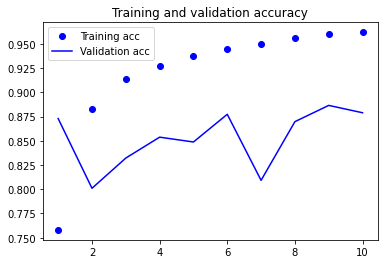

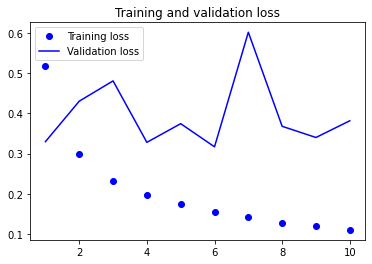

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<br>
<h4>학습 결과</h4>
<br>

- 학습 결과를 보면 검증 데이터 세트의 정확도가 88%로 simpleRNN을 사용했을 때보다 정확도가 높은 것을 볼 수 있음

<br>
<hr>
<h3>GRU</h3>

<br>

- GRU는 LSTM의 간소화된 버전
- LSTM에서의 두 상태 벡터가 하나의 벡터로 합쳐짐
- 하나의 gate controller인 z가 forget과 input 게이트를 모두 제어함
- GRU는 output 게이트가 없어 전체 상태 벡터가 타임 스텝마다 출력되며, 이전 상태의 어느 부분이 출력될지 제어하는 새로운 gate controller가 있음

<br>

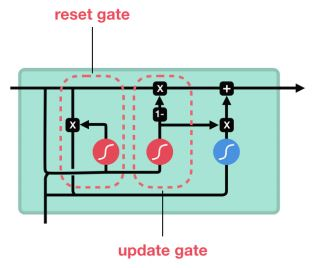

In [23]:
Image("myImages/GRU.jpg")

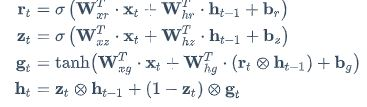

In [24]:
Image("myImages/GRUCode.jpg")

<br>
<h4>GRU 실행 예제</h4>
<br>

In [13]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 23s 139ms/step - loss: 0.6311 - acc: 0.6540 - val_loss: 0.4152 - val_acc: 0.8272
Epoch 2/10
157/157 [==============================] - 23s 144ms/step - loss: 0.3544 - acc: 0.8532 - val_loss: 0.3382 - val_acc: 0.8638
Epoch 3/10
157/157 [==============================] - 23s 144ms/step - loss: 0.2650 - acc: 0.8956 - val_loss: 0.3475 - val_acc: 0.8598
Epoch 4/10
157/157 [==============================] - 23s 144ms/step - loss: 0.2260 - acc: 0.9152 - val_loss: 0.3119 - val_acc: 0.8762
Epoch 5/10
157/157 [==============================] - 23s 144ms/step - loss: 0.1877 - acc: 0.9320 - val_loss: 0.4173 - val_acc: 0.8468
Epoch 6/10
157/157 [==============================] - 23s 147ms/step - loss: 0.1721 - acc: 0.9377 - val_loss: 0.3193 - val_acc: 0.8702
Epoch 7/10
157/157 [==============================] - 23s 147ms/step - loss: 0.1607 - acc: 0.9413 - val_loss: 0.5071 - val_acc: 0.8266
Epoch 8/10
157/157 [==============================] - 2

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


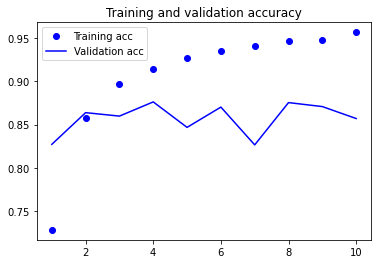

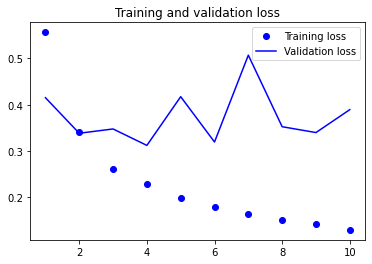

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<br>
<h4>학습 결과</h4>
<br>

- 학습 결과를 보면 GRU으로 IMDB 리뷰 데이터 세트 분류의 정확도는 검증 데이터에서 약 87%의 분류 정확도를 보여줌
- 학습 데이터의 정확도는 95.8%까지 상승하였지만, 이는 Overfitting된 결과로 보임

<br>
<hr>
<h3>VAE(Variational AutoEncoders)</h3>

<br>
<h4>이미지 생성</h4>
<br>

- 이미자의 잠재 공간에서 샘플링하여 완전히 새로운 이미지나 기존 이미지를 변형하는 방식은 현재 인기 있고 성공적으로 AI 애플리케이션을 만들 수 있는 방법
- 이미지 생성의 핵심 아이디어는 각 포인트가 실제와 같은 이미지로 매핑이 될 수 있는 저차원 잠재 공간의 표현을 만드는 것
- 잠재 공간의 한 포인트를 입력으로 받아 이미지를 출력하는 모듈을 생성자, 또는 디코더라고 부름
- 잠재 공간이 만들어지면 여기서 포인트를 하나를 특정하여 또는 무작위로 샘플링할 수 있음

<br>

<br>
<h4>고전적인 오토인코더의 문제점</h4>
<br>

- 고전적인 오토인코더는 이미지를 입력받아 인코더 모듈을 사용하여 잠재 벡터 공간으로 매핑함
- 그 다음 디코더 모듈을 사용하여 원본 이미지와 동일한 차원으로 복원하여 출력함
- 오토인코더는 원본 입력을 재구성하는 방법을 학습
- 일반적으로 코딩이 저차원이고 희소하도록 제약을 가하며 이런 경우 인코더는 입력 데이터의 정보를 적은 수의 비트에 압축하기 위해 노력함
- 현실적으로 오토인코더는 특별히 유용하거나 구조화가 잘된 잠재 공간을 만들지 못하며 압축률도 뛰어나지 않음

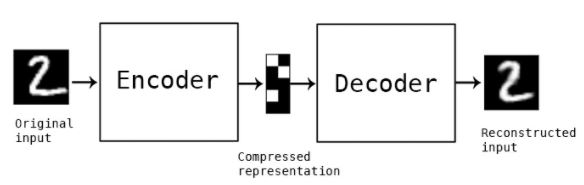

In [25]:
Image("myImages/VAETitle.jpg")

<br>
<h4>VAE</h4>
<br>

- 입력 이미지를 잠재 공간의 고정된 코딩으로 압축하는 대신 VAE는 이미지를 어떤 통계 분포의 파라매터로 변환함
- 입력 이미지가 통계적 과정을 통해서 생성되었다고 가정하여 인코딩과 디코딩하는 동안 무작위성이 필요하다는 것을 의미함
- VAE는 평균과 분산 파라매터를 사용하여 이 분포에서 무작위로 하나의 샘플을 추출
- 이런 무직위한 과정은 안정성을 향상하고 잠재 공간 어디서든 의미 있는 표현을 인코딩하도록 만듬

<br>
<h4>VAE의 기술적 접근</h4>
<br>

- 인코더 모듈이 입력 샘플을 잠재 공간의 두 파라매터로 변환
- 입력 이미지가 생성되었다고 가정한 잠재 공간의 정규 분포에서 포인트를 무작위로 샘풀링 -> 앱실론은 작은 값을 가진 랜덤 텐서
- 디코더 모듈은 잠재 공간의 포인트를 원본 입력이미지로 매핑

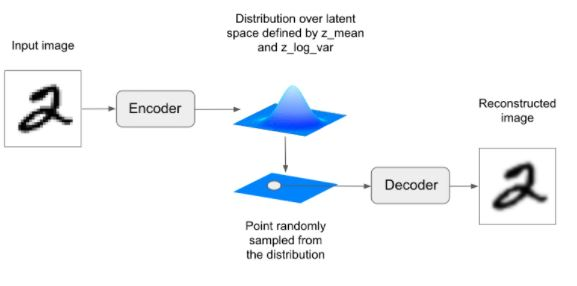

In [27]:
Image("myImages/VAEFigure.jpg")

<br>
<h4>VAE 실행 예제</h4>
<br>

In [3]:
img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2  # 잠재 공간의 차원: 2D 평면

input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3,
                  padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu',
                  strides=(2, 2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [4]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

In [5]:
# Input에 z를 주입합니다
decoder_input = layers.Input(K.int_shape(z)[1:])

# 입력을 업샘플링합니다
x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

# 인코더 모델의 마지막 Flatten 층 직전의 특성 맵과 같은 크기를 가진 특성 맵으로 z의 크기를 바꿉니다
x = layers.Reshape(shape_before_flattening[1:])(x)

# Conv2DTranspose 층과 Conv2D 층을 사용해 z를 원본 입력 이미지와 같은 크기의 특성 맵으로 디코딩합니다
x = layers.Conv2DTranspose(32, 3,
                           padding='same', activation='relu',
                           strides=(2, 2))(x)
x = layers.Conv2D(1, 3,
                  padding='same', activation='sigmoid')(x)
# 특성 맵의 크기가 원본 입력과 같아집니다

# 디코더 모델 객체를 만듭니다
decoder = Model(decoder_input, x)

# 모델에 z를 주입하면 디코딩된 z를 출력합니다
z_decoded = decoder(z)

In [6]:
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(
            1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        # 출력 값을 사용하지 않습니다
        return x

# 입력과 디코딩된 출력으로 이 층을 호출하여 모델의 최종 출력을 얻습니다
y = CustomVariationalLayer()([input_img, z_decoded])

In [7]:
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

# MNIST 숫자 이미지에서 VAE를 훈련합니다
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

vae.fit(x=x_train, y=None,
        shuffle=True,
        epochs=10,
        batch_size=batch_size,
        validation_data=(x_test, None))

C:\Users\USER\AppData\Local\conda\conda\envs\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

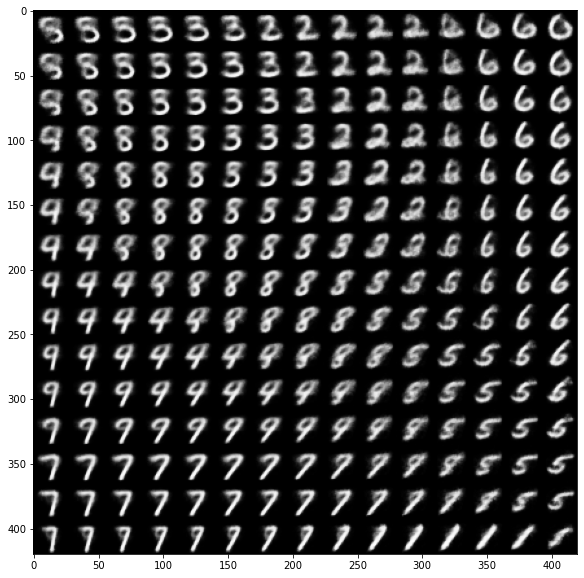

In [8]:
# Display a 2D manifold of the digits
n = 15  # 15 × 15 숫자의 그리드를 출력합니다
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# 싸이파이 ppf 함수를 사용하여 일정하게 떨어진 간격마다 잠재 변수 z의 값을 만듭니다
# 잠재 공간의 사전 확률은 가우시안입니다
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

<br>
<h4>VAE의 특징</h4>
<br>

- VAE는 매우 구조적이고 연속적인 잠재 공간의 표현을 만듬
- 이런 이유로 잠재 공간 안에서 일어나는 모든 종류의 이미지 변형 작업에 잘 맞음
- 잠재 공간을 가로질러 이미지가 변환하는 잠재 공간 기반의 애니메이션에도 잘 맞음
- 시작 이미지가 연속적으로 다른 이미지로 부드럽게 바뀌는 것을 볼 수 있음

<br>
<hr>
<h3>GAN(Generative Adversarial Networks)</h3>

<br>

- GAN은 생성된 이미지가 실제 이미지와 통계적으로 거의 구분이 되지 않도록 강제하여 아주 실제 같은 합성 이미지를 생성
- GAN의 2개의 네트워크
    - 생성자 네트워크(generator network): 랜덤 벡터를 입력으로 받아 이를 합성된 이미지로 디코딩
    - 판별자 네트워크(discriminator network): 이미지를 입력으로 받아 훈련 세트에서 온 이미지인지, 생성자 네트워크가 만든 이미지인지 판별

<br>

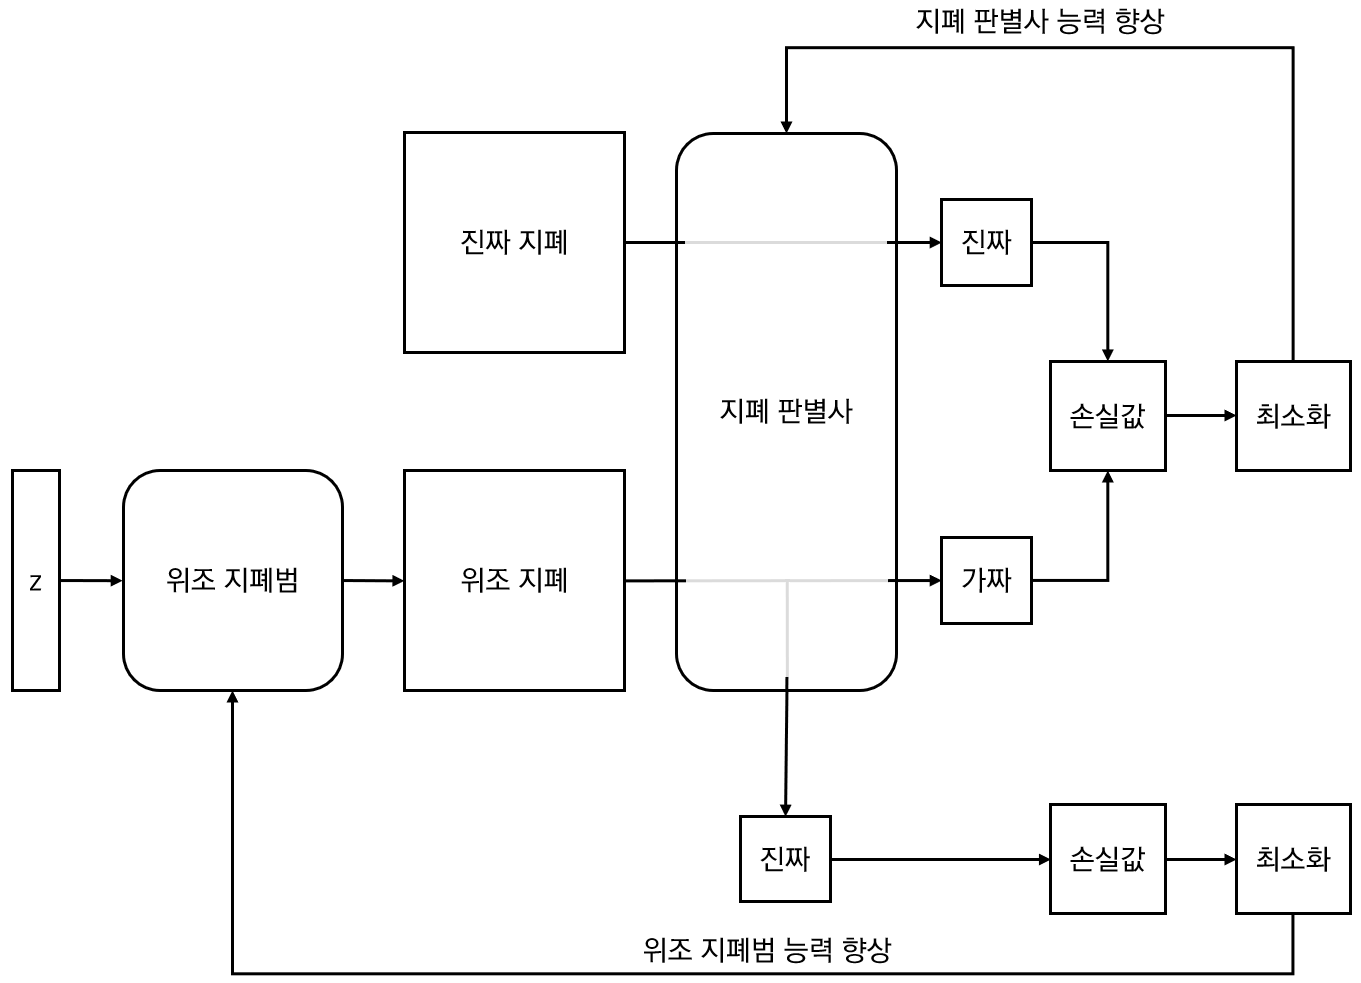

In [28]:
Image("myImages/GAN_OVERVIEW.png")

<br>

1. 위조범은 지폐를 형편없이 위조함
2. 진짜 지폐와 위조 지폐를 섞어서 지폐 판별사한테 보여줌
3. 자폐 판별사는 각 지폐가 진자인지 평가하고 위조범한테 피드백을 줌
4. 위조범은 다시 위조 지폐를 준비함
5. 시간이 지남에 따라 위조범은 점점 능숙해짐
6. 지폐 판별사도 위조 지폐를 구분하는 데 점점 능숙해짐

<br>

- GAN은 최적화의 최솟값이 고정되지 않은 시스템
- 보통 경사 하강법은 고정된 손실 공간에서 언덕을 내려오는 방법
- GAN은 언덕을 내려오는 매 단계가 조금씩 전체 공간을 바꿈
- 최적화 과정이 최솟값을 찾는것이 아니라 두 힘 간의 평형점을 찾는 다이나믹 시스템
- GAN을 만들기 위해서는 모델 구조와 훈련 파라매터를 주의 깊게 많이 조정해야 함

<br>
<h4>GAN 구현 방법</h4>
<br>

- 생성자의 마지막 활성화로 다른 종류의 모델에서 널리 사용하는 sigmoid 대신 tanh 함수를 사용
- 균등 분포가 아니고 정규 분포를 사용하여 잠재 공간에서 포인트를 샘플링
- 무작위성은 모델을 견고하게 만듬
- GAN 훈련은 동적 평형을 만들기 때문에 여러 방식으로 갇힐 가능성이 높음
- 회소한 그레디언트는 GAN 훈련을 방해할 가능성이 있음
- 최대 풀링 대신 스트라이드 합성곱을 사용하여 다운샘플링을 하는 것이 좋음
- ReLU 활성화 대신 LeakyReLU 층을 사용

<br>
<h4>GAN 실행 코드</h4>
<br>

In [9]:
latent_dim = 32
height = 32
width = 32
channels = 3

generator_input = keras.Input(shape=(latent_dim,))

# 입력을 16 × 16 크기의 128개 채널을 가진 특성 맵으로 변환합니다
x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)

# 합성곱 층을 추가합니다
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

# 32 × 32 크기로 업샘플링합니다
x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)

# 합성곱 층을 더 추가합니다
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

# 32 × 32 크기의 1개 채널을 가진 특성 맵을 생성합니다
x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32768)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 256)       1048832   
__________

In [10]:
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

# 드롭아웃 층을 넣는 것이 아주 중요합니다!
x = layers.Dropout(0.4)(x)

# 분류 층
x = layers.Dense(1, activation='sigmoid')(x)

discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()

# 옵티마이저에서 (값을 지정하여) 그래디언트 클리핑을 사용합니다
# 안정된 훈련을 위해서 학습률 감쇠를 사용합니다
discriminator_optimizer = keras.optimizers.RMSprop(lr=0.0008, clipvalue=1.0, decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 128)         262272    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 6, 6, 128)         0         
__________

In [11]:
# 판별자의 가중치가 훈련되지 않도록 설정합니다(gan 모델에만 적용됩니다)
discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

In [12]:
# CIFAR10 데이터를 로드합니다
(x_train, y_train), (_, _) = keras.datasets.cifar10.load_data()

# 개구리 이미지를 선택합니다(클래스 6)
x_train = x_train[y_train.flatten() == 6]

# 데이터를 정규화합니다
x_train = x_train.reshape(
    (x_train.shape[0],) + (height, width, channels)).astype('float32') / 255.

iterations = 10000
batch_size = 20
save_dir = './myImages/gan_images/'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

# 훈련 반복 시작
start = 0
for step in range(iterations):
    # 잠재 공간에서 무작위로 포인트를 샘플링합니다
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # 가짜 이미지를 디코딩합니다
    generated_images = generator.predict(random_latent_vectors)

    # 진짜 이미지와 연결합니다
    stop = start + batch_size
    real_images = x_train[start: stop]
    combined_images = np.concatenate([generated_images, real_images])

    # 진짜와 가짜 이미지를 구분하여 레이블을 합칩니다
    labels = np.concatenate([np.ones((batch_size, 1)),
                             np.zeros((batch_size, 1))])
    # 레이블에 랜덤 노이즈를 추가합니다. 아주 중요합니다!
    labels += 0.05 * np.random.random(labels.shape)

    # discriminator를 훈련합니다
    d_loss = discriminator.train_on_batch(combined_images, labels)

    # 잠재 공간에서 무작위로 포인트를 샘플링합니다
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # 모두 “진짜 이미지"라고 레이블을 만듭니다
    misleading_targets = np.zeros((batch_size, 1))

    # generator를 훈련합니다(gan 모델에서 discriminator의 가중치는 동결됩니다)
    a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)
    
    start += batch_size
    if start > len(x_train) - batch_size:
      start = 0

    # 중간 중간 저장하고 그래프를 그립니다
    if step % 100 == 0:
        # 모델 가중치를 저장합니다
        gan.save_weights('gan.h5')

        # 측정 지표를 출력합니다
        print('스텝 %s에서 판별자 손실: %s' % (step, d_loss))
        print('스텝 %s에서 적대적 손실: %s' % (step, a_loss))

        # 생성된 이미지 하나를 저장합니다
        img = image.array_to_img(generated_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'generated_frog' + str(step) + '.png'))

        # 비교를 위해 진짜 이미지 하나를 저장합니다
        img = image.array_to_img(real_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'real_frog' + str(step) + '.png'))

C:\Users\USER\AppData\Local\conda\conda\envs\venv\lib\site-packages\keras\engine\training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


스텝 0에서 판별자 손실: 0.7029454
스텝 0에서 적대적 손실: 0.70527136
스텝 100에서 판별자 손실: 0.778014
스텝 100에서 적대적 손실: 3.6437817
스텝 200에서 판별자 손실: 0.72927225
스텝 200에서 적대적 손실: 0.68427426
스텝 300에서 판별자 손실: 0.6978024
스텝 300에서 적대적 손실: 0.7251724
스텝 400에서 판별자 손실: 0.6861651
스텝 400에서 적대적 손실: 0.7737533
스텝 500에서 판별자 손실: 0.63579166
스텝 500에서 적대적 손실: 1.927758
스텝 600에서 판별자 손실: 0.68669194
스텝 600에서 적대적 손실: 0.7575786
스텝 700에서 판별자 손실: 0.6996482
스텝 700에서 적대적 손실: 0.7620732
스텝 800에서 판별자 손실: 0.68817693
스텝 800에서 적대적 손실: 0.730916
스텝 900에서 판별자 손실: 0.7109596
스텝 900에서 적대적 손실: 0.7396342
스텝 1000에서 판별자 손실: 0.69645834
스텝 1000에서 적대적 손실: 0.7477633
스텝 1100에서 판별자 손실: 0.69106936
스텝 1100에서 적대적 손실: 0.76364833
스텝 1200에서 판별자 손실: 0.6970431
스텝 1200에서 적대적 손실: 0.814943
스텝 1300에서 판별자 손실: 0.68740565
스텝 1300에서 적대적 손실: 0.73779917
스텝 1400에서 판별자 손실: 0.7011604
스텝 1400에서 적대적 손실: 0.7388607
스텝 1500에서 판별자 손실: 0.695502
스텝 1500에서 적대적 손실: 0.7541684
스텝 1600에서 판별자 손실: 0.6979152
스텝 1600에서 적대적 손실: 0.73474324
스텝 1700에서 판별자 손실: 0.710194
스텝 1700에서 적대적 손실: 0.6915524
스텝 1800에서 

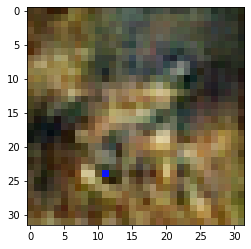

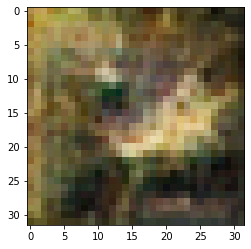

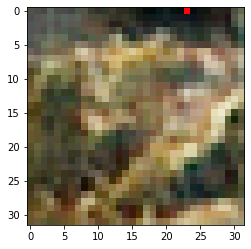

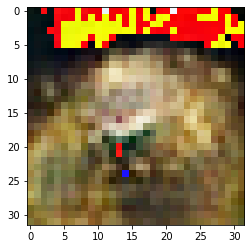

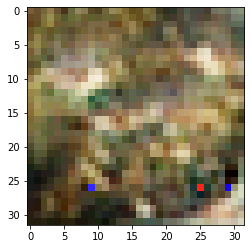

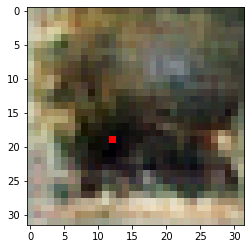

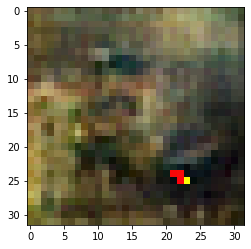

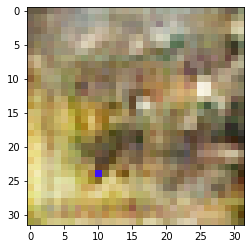

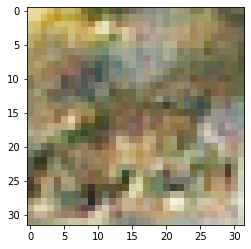

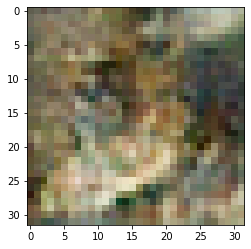

In [13]:
# 잠재 공간에서 랜덤한 포인트를 샘플링합니다
random_latent_vectors = np.random.normal(size=(10, latent_dim))

# 가짜 이미지로 디코딩합니다
generated_images = generator.predict(random_latent_vectors)

for i in range(generated_images.shape[0]):
    img = image.array_to_img(generated_images[i] * 255., scale=False)
    plt.figure()
    plt.imshow(img)
    
plt.show()

<br>
<h4>학습 결과</h4>
<br>

- 아래의 GAN의 학습 결과를 보면 초반에는 랜덤적인 이미지를 반환하지만, 점점 학습이 진행됨에 따라 실제 개구리의 이미지를 가깝게 구현하는 것을 볼 수 있음
- 10,000회의 학습이 부족하지만, 좀 더 진행한다면 실제 개구리의 이미지와 구분하기 어려운 가짜 개구리 이미지를 반환할 수 있을 것으로 기대

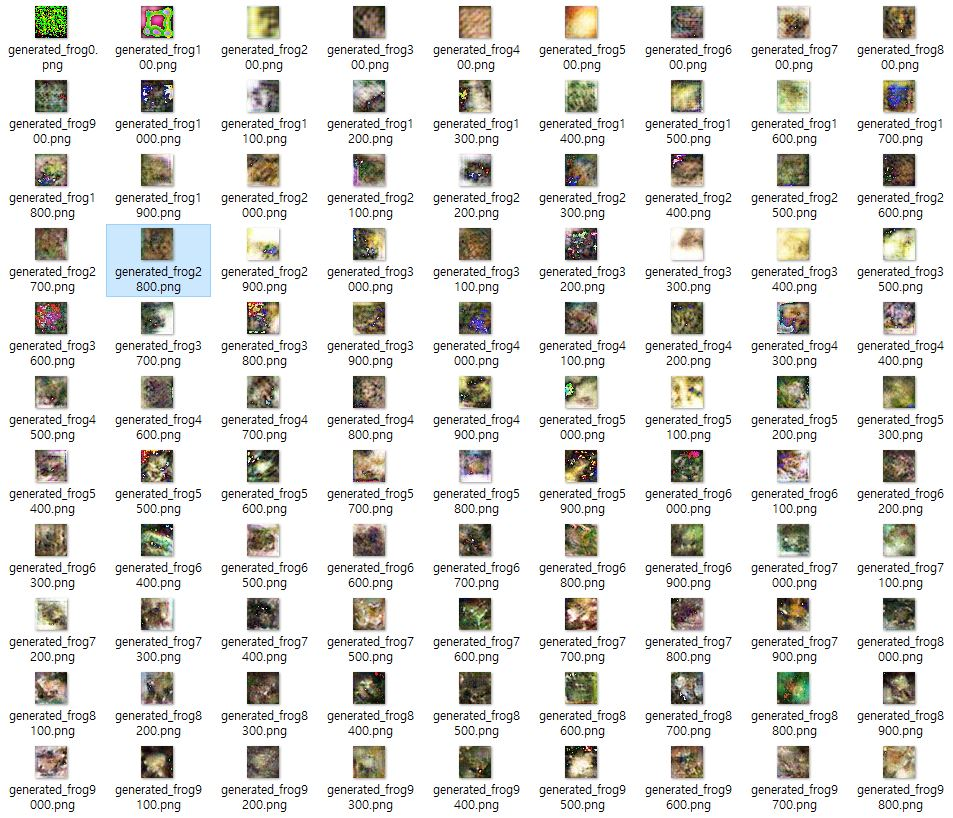

In [29]:
Image("myImages/Frog.jpg")

<br>
<h4>GAN 특징</h4>
<br>

- GAN은 생성자 네트워크와 판별자 네트워크가 연결되어 구성됨
- 판별자는 생성자의 출력과 훈련 데이터 세트에서 가져온 진짜 이미지를 구분하도록 훈련
- 생성자는 판별자를 속이도록 훈련
- GAN 훈련이 고정된 손실 공간에서 수행하는 단순한 경사 하강법 과정이 아니라 동적 과정이기 때문에 훈련이 어려움
- GAN을 올바르게 훈련하려면 경험적으로 찾은 여러 기교를 사용하고 많은 튜닝을 해야 함
- GAN은 실제 같은 이미지를 만들 수 있음
- VAE와는 달리 학습된 잠재 공간이 깔끔하게 연속된 구조를 가지지 않으며 잠재 공간의 개념 벡터를 사용하여 이미지를 변형하는 등 실용적인 특정 애플리케이션에는 잘 맞지 않음